In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
%load_ext tensorboard
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import metrics
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

print(tf.__version__)
print(keras.__version__)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
2.2.0-rc2
2.3.0-tf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
mnist=tf.keras.datasets.mnist

In [3]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_train.dtype)

(60000, 28, 28)
uint8


In [4]:
labelNames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

print(np.shape(X_train))
print(np.shape(X_test))

(60000, 28, 28)
(10000, 28, 28)


In [5]:
valid_images = X_train[:5000].astype('float32') / 255.0
valid_labels = y_train[:5000]

train_images = X_train[5000:].astype('float32') / 255.0
train_labels = y_train[5000:]

test_images = X_test.astype('float32') / 255.0
test_labels = y_test
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


In [6]:
print("Validation data after reshaping:{}".format(np.shape(valid_images)))
print("Train data after reshaping:{}".format(np.shape(X_train)))
print("Test data after reshaping :{}".format(np.shape(X_test)))

Validation data after reshaping:(5000, 28, 28)
Train data after reshaping:(60000, 28, 28)
Test data after reshaping :(10000, 28, 28)


In [7]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(7, 7),
                  cells_per_block=(1, 1), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  data_train.append(H)
  labels_train.append(y_train[img_index])

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 144)
(60000,)


In [8]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
data_test = []
labels_test = []

# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H1 = feature.hog(img, orientations=9, pixels_per_cell=(7, 7),
                  cells_per_block=(1, 1), transform_sqrt=True, block_norm="L2-Hys")
  # update the data and labels
  data_test.append(H1)
  labels_test.append(y_test[img_ind])
  
print(np.shape(data_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000, 144)
(10000,)


In [0]:
data_train = np.asarray(data_train)
labels_train = np.asarray(labels_train)
data_test = np.asarray(data_test)
labels_test = np.asarray(labels_test)

Epoch 1/15
540/540 [==============================] - 10s 18ms/step - loss: 0.2484 - accuracy: 0.9217 - val_loss: 0.1324 - val_accuracy: 0.9557
Epoch 2/15
540/540 [==============================] - 10s 18ms/step - loss: 0.1260 - accuracy: 0.9589 - val_loss: 0.0970 - val_accuracy: 0.9690
Epoch 3/15
540/540 [==============================] - 10s 18ms/step - loss: 0.0945 - accuracy: 0.9688 - val_loss: 0.1305 - val_accuracy: 0.9572
Epoch 4/15
540/540 [==============================] - 10s 18ms/step - loss: 0.0775 - accuracy: 0.9742 - val_loss: 0.1274 - val_accuracy: 0.9608
Epoch 5/15
540/540 [==============================] - 10s 18ms/step - loss: 0.0601 - accuracy: 0.9795 - val_loss: 0.1072 - val_accuracy: 0.9713
Epoch 6/15
540/540 [==============================] - 10s 18ms/step - loss: 0.0495 - accuracy: 0.9830 - val_loss: 0.1244 - val_accuracy: 0.9648
Epoch 7/15
540/540 [==============================] - 10s 19ms/step - loss: 0.0420 - accuracy: 0.9856 - val_loss: 0.1263 - val_accuracy:

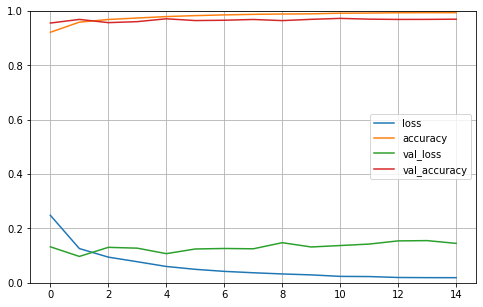

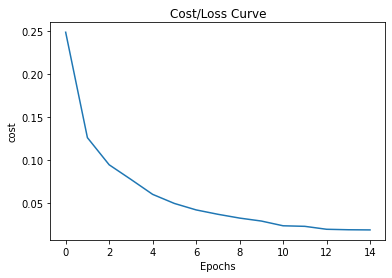


# Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 0.1528 - accuracy: 0.9677
test loss, test acc: [0.15278178453445435, 0.9677000045776367]


In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1024, activation=tf.nn.relu, input_dim=144),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Hist=model.fit(data_train, labels_train, epochs=15, batch_size=100, validation_split=0.1)

model.summary()

pd.DataFrame(Hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

plt.plot(Hist.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

print('\n# Evaluate on test data')
results = model.evaluate(data_test,labels_test)
print('test loss, test acc:', results)

Epoch 1/15
90/90 [==============================] - 2s 19ms/step - loss: 2.2591 - accuracy: 0.2411 - val_loss: 2.2134 - val_accuracy: 0.4540
Epoch 2/15
90/90 [==============================] - 2s 17ms/step - loss: 2.1539 - accuracy: 0.5731 - val_loss: 2.0942 - val_accuracy: 0.6650
Epoch 3/15
90/90 [==============================] - 2s 17ms/step - loss: 1.9964 - accuracy: 0.7010 - val_loss: 1.9058 - val_accuracy: 0.7330
Epoch 4/15
90/90 [==============================] - 2s 18ms/step - loss: 1.7593 - accuracy: 0.7682 - val_loss: 1.6345 - val_accuracy: 0.7910
Epoch 5/15
90/90 [==============================] - 2s 18ms/step - loss: 1.4561 - accuracy: 0.8060 - val_loss: 1.3234 - val_accuracy: 0.8210
Epoch 6/15
90/90 [==============================] - 2s 17ms/step - loss: 1.1498 - accuracy: 0.8412 - val_loss: 1.0409 - val_accuracy: 0.8470
Epoch 7/15
90/90 [==============================] - 2s 17ms/step - loss: 0.8962 - accuracy: 0.8691 - val_loss: 0.8209 - val_accuracy: 0.8680
Epoch 8/15
90

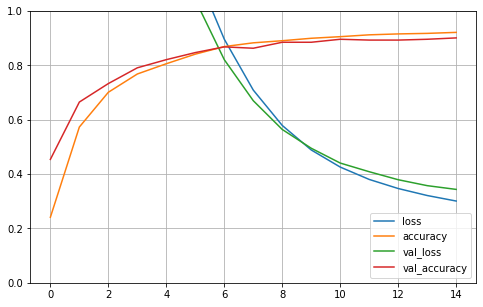

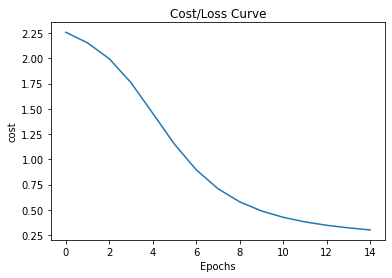


# Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 0.2951 - accuracy: 0.9222
test loss, test acc: [0.29513880610466003, 0.9222000241279602]


In [11]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Dense(1024, activation=tf.nn.relu, input_dim=144),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Hist1=model1.fit(data_test, labels_test, epochs=15, batch_size=100, validation_split=0.1)

model.summary()

pd.DataFrame(Hist1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

plt.plot(Hist1.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

print('\n# Evaluate on test data')
results=model1.evaluate(data_test,labels_test)
print('test loss, test acc:', results)

In [0]:
##cm  = metrics.confusion_matrix(y_test, predict_test)
##print(cm)